In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TSAACS: Exercise Sheet 6 - Jamal, Lei, Dominik #

## Exercise 1 ##

### Task 1 ###

Autoregressive Process of order $p \in \mathbb{R}$ for $N>p$ steps.

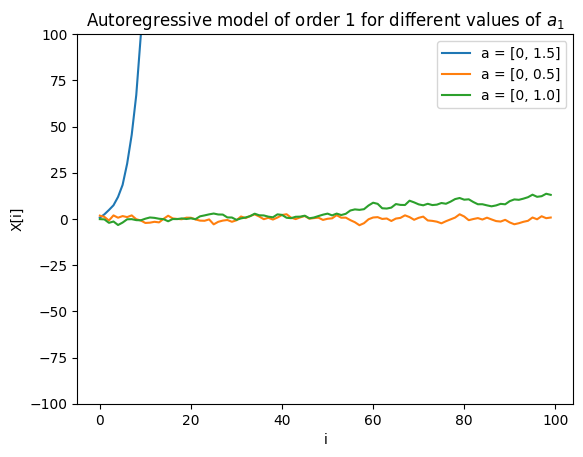

In [29]:
def autoreg(a, N, sigma=1.0):
    X = np.zeros(N)                     # output signal
    WN = np.random.normal(0, sigma, N)  # white noise
    p = len(a) - 1                      # order of the model
    assert p < N
    for i in range(N):
        X[i] = a[0] + WN[i]             # add a_0 to each entry X[i]
        for j in range(p):
            if i-j-1 >= 0:              # for each entry X[i] add the previous p entries (or all previous entries if p < i)
                X[i] += a[j+1]*X[i-j-1]

    return X

# Test the Function
N = 100
X_1 = autoreg([0, 1.5], N)
X_2 = autoreg([0, 0.5], N)
X_3 = autoreg([0, 1.0], N)

plt.plot(X_1, label='a = [0, 1.5]')
plt.plot(X_2, label='a = [0, 0.5]')
plt.plot(X_3, label='a = [0, 1.0]')
plt.legend()
plt.ylim(-100, 100)
plt.title('Autoregressive model of order 1 for different values of $a_1$')
plt.xlabel('i')
plt.ylabel('X[i]')
plt.show()




Running the test for a few times shows that with $a_1 = 1.5$, $X_i$ diverges quickly, 
for $a_1 = 1.0$ and $a_1 = 0.5$ the series does not diverge and stays around 0, while for $a_1 = 1.0$ the variance is higher than for $a_1 = 0.5$
 

### Task 2 ###
for each lag $l\in \mathbb{N}, 1<l<N$: find for each $t \in \{l,\dots,N\}$ vectors $\beta^{(0)}, beta^{}

Text(0, 0.5, 'Partial Autocorrelation')

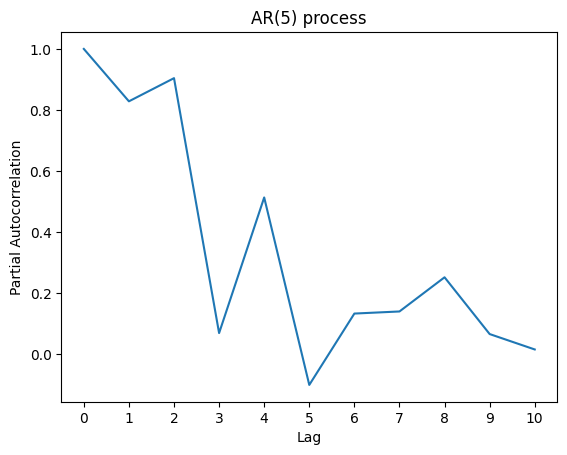

In [80]:



def order_estimator(X, max_order=10):
    N = len(X) - 1
    # only consider lag up to maximum N
    if max_order > (len(X) - 1):
        max_order = len(X) - 1
    
    results = np.zeros(max_order + 1)

    # for lag 0 the autocorrelation is 1 since Cov(X_t, X_t) = Var(X_t)
    results[0] = 1
    # for lag 1
    mean = np.mean(X)
    cov = np.sum((X[1:] - mean)*(X[:-1] - mean))/(N-1)
    var = np.var(X)
    corr = cov/var
    results[1] = corr

    # for lag > 1 calculate partial autocorrelation as described

    # TODO Fix the code below to definition of partial autocorrelation
    for l in range(2,max_order+1):
        # initialize the regression matrix
        X_t_reg = np.zeros((N-l))   
        X_t_l_reg = np.zeros((N-l))
        X_between_reg = np.zeros((N-l,l-1))
        # Assemble the regression matrix for the lag l
        for t in range(l,N):
            X_between = X[t-l+1:t]
            X_t = X[t]
            X_t_l = X[t-l]
            X_t_reg[t-l] = X_t
            X_t_l_reg[t-l] = X_t_l
            X_between_reg[t-l] = X_between
        # perform two linear regressions
        beta = np.linalg.lstsq(X_between_reg, X_t_reg, rcond=None)
        beta_l = np.linalg.lstsq(X_between_reg, X_t_l_reg, rcond=None)
        # calculate the residuals
        residuals = X_t_reg - np.dot(X_between_reg, beta[0])
        residuals_l = X_t_l_reg - np.dot(X_between_reg, beta_l[0])
        # correlation of residuals
        corr = np.corrcoef(residuals, residuals_l)[0,1]
        results[l] = corr
    return results

    
# create ar process of order 5
X_1 = autoreg([0.0, 0.3, 0.6, 0.1, 0.7], 100)


partial_autocorr_coeffs = order_estimator(X_1)

# plot X_1
plt.plot(partial_autocorr_coeffs)
plt.title('AR(5) process')
# ticks at every integer
plt.xticks(range(0, len(partial_autocorr_coeffs)))
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
